In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading and making a copy of the dataset

main_df = pd.read_csv(r"C:\Users\luong\Downloads\archive (2)\marketing_campaign.csv", sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### EDA

In [4]:
# Checking the shape of the dataset

df.shape

(2240, 29)

In [5]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

<AxesSubplot: >

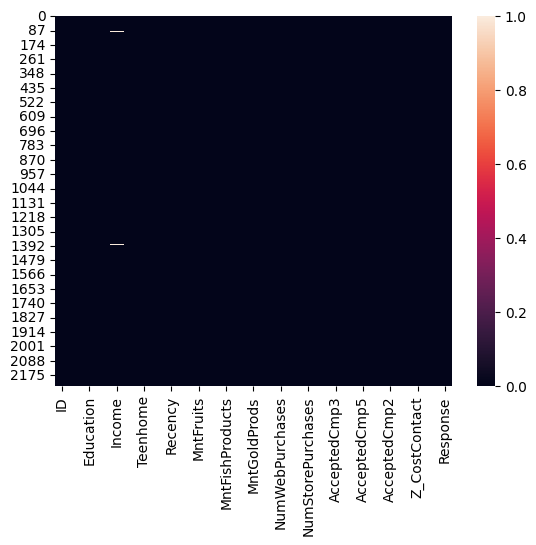

In [8]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [9]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### Preprocessing of the dataset

In [10]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [12]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

* In the above cell we are grouping 'Married', 'Together' as "relationship" 
* Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [14]:
# Count of different values present in Marital_Status

df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [15]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [16]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [17]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [18]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [19]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [20]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['first_day'] = pd.to_datetime('01-01-2015', format='%d-%m-%Y')
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days


In [21]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

### Visualization

In [22]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

In [23]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

**Less number of single customer**

In [24]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [25]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [26]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [27]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [28]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [29]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

**35% of the customer are single whereas more 64% are in relationship.**

In [30]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show ()

** More than 97% customer are from PG background. and Approx. 2% are from UG.

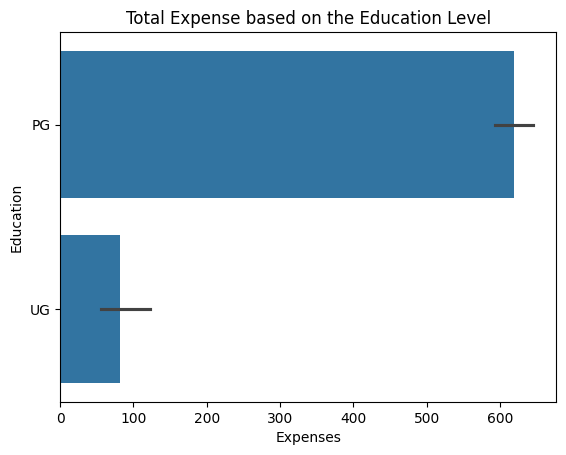

In [31]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

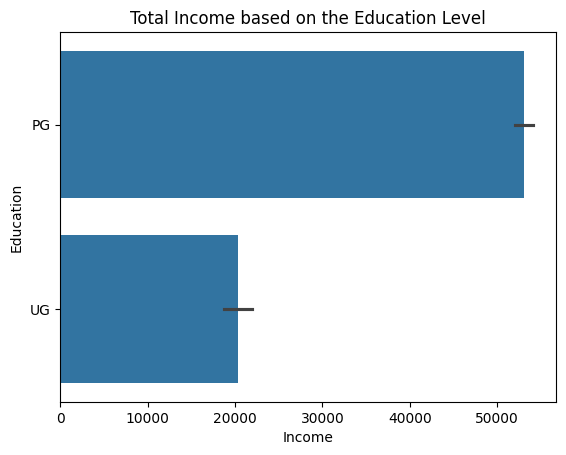

In [32]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

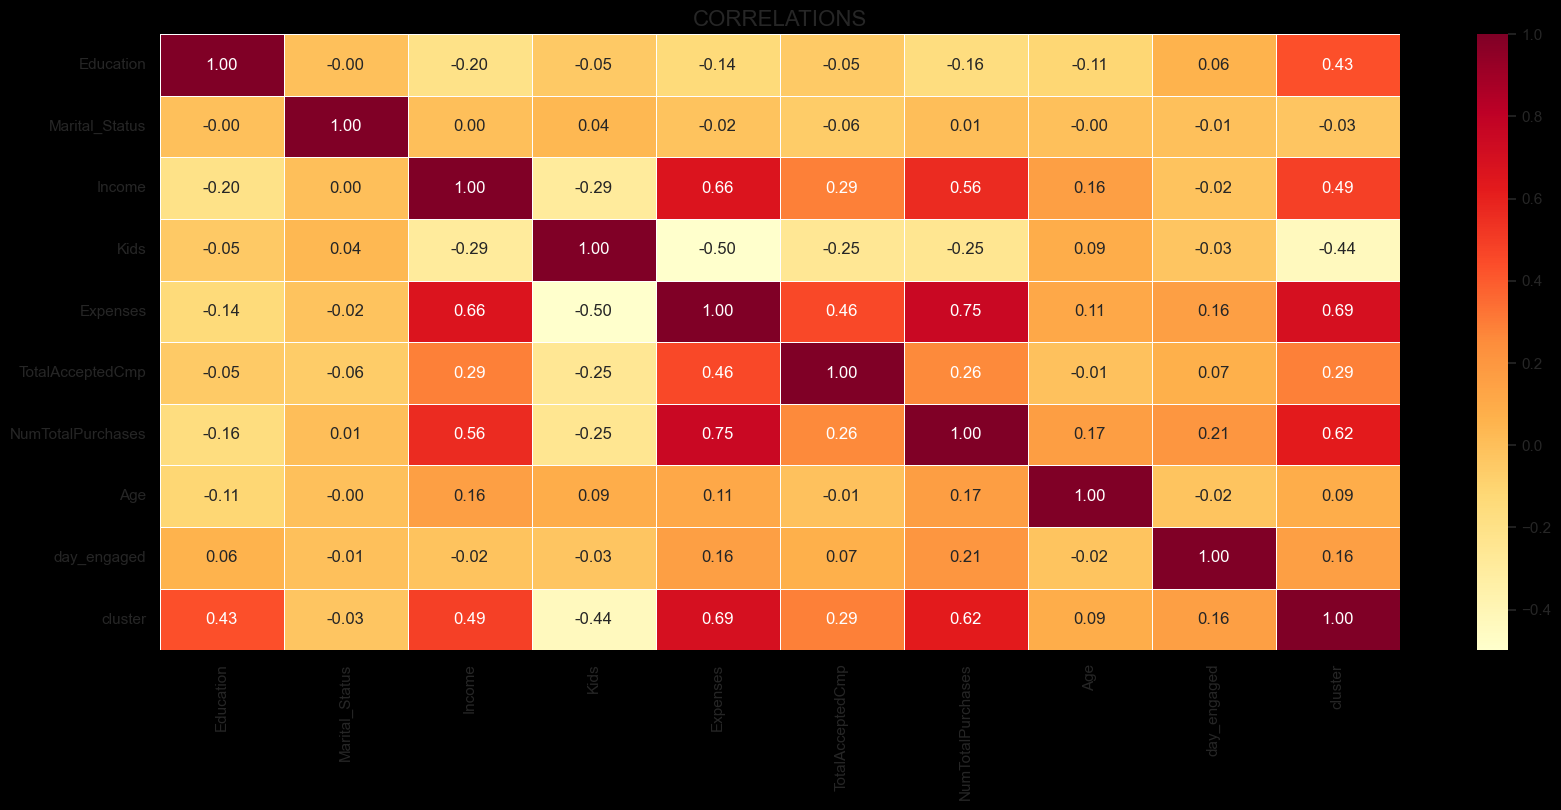

In [63]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=0.5)
plt.title("CORRELATIONS", fontsize=16)
sns.set_theme(style='white')
plt.show()

In [65]:
# Obtain correlation values greater than 0.4
correlation_greater_than_04 = corr_matrix[corr_matrix > 0.4]

<AxesSubplot: >

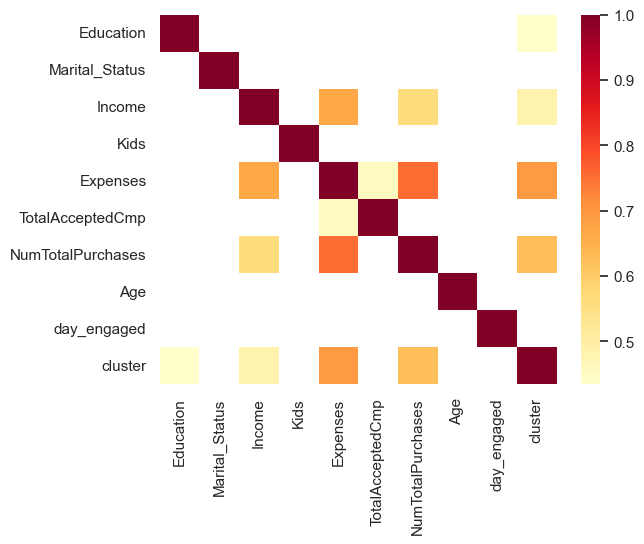

In [66]:
sns.heatmap(correlation_greater_than_04, cmap='YlOrRd')


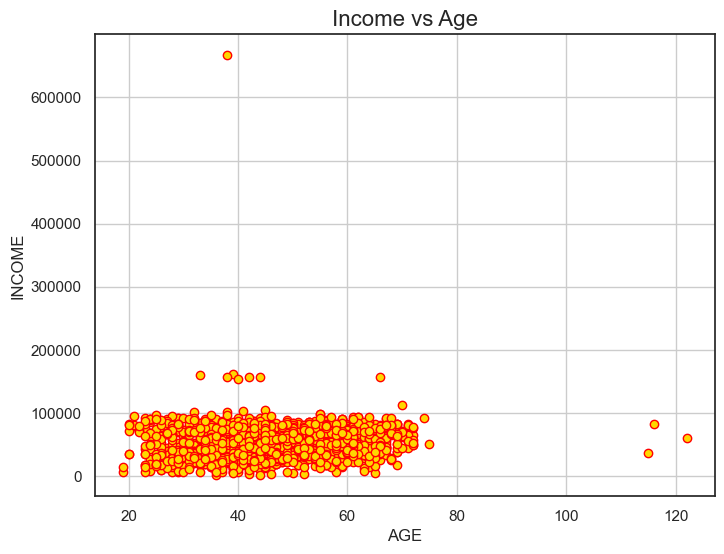

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], color='gold', edgecolors='red')
plt.title('Income vs Age', fontsize=16)
plt.xlabel('AGE', fontsize=12)
plt.ylabel('INCOME', fontsize=12)
plt.grid(True)
plt.show()

In [33]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


In [64]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

[]


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### Label Encoding

In [37]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [38]:
df1 = df.copy()

### Standardization 

In [39]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [40]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012


### Elbow Method 

In [41]:
from sklearn.cluster import KMeans

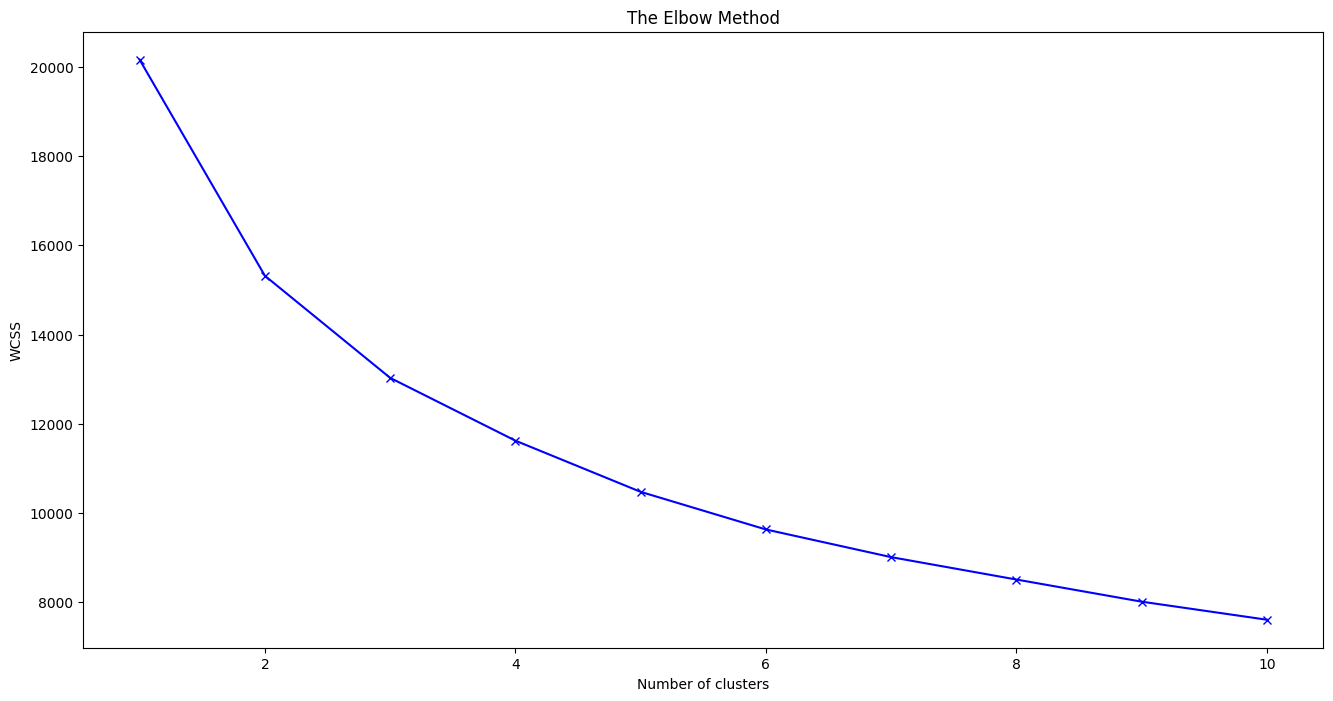

In [42]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**As it is not very clear from the elbow method that which value of K to choose.**

### Silhouette Score

In [43]:
from sklearn.metrics import silhouette_score 

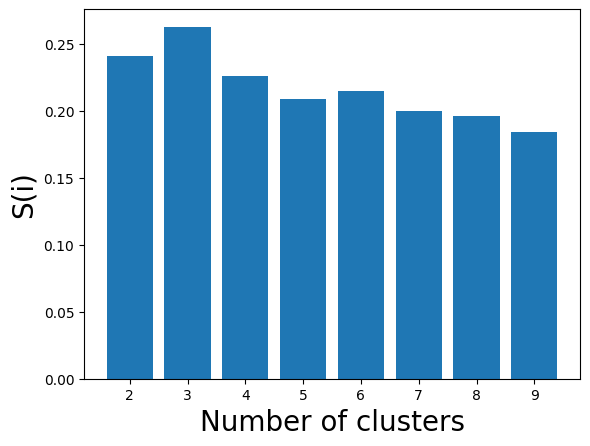

In [44]:

silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

**Here we are using Silhouette score to measure the value of K**

In [45]:
silhouette_scores

[0.24115026328011627,
 0.26266881837803874,
 0.22614017820607632,
 0.20883538164050078,
 0.21442120455505384,
 0.19947880630866072,
 0.19627871532133395,
 0.1840048349667207]

In [46]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


### Model Building

In [47]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

In [48]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,849,2
1,0,0,46344.0,2,27,0,6,61,299,1
2,0,1,71613.0,0,776,0,21,50,498,2
3,0,1,26646.0,1,53,0,8,31,325,1
4,0,1,58293.0,1,422,0,19,34,347,1


In [49]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012


In [50]:
df['Education'].value_counts()

0    2186
1      54
Name: Education, dtype: int64

### Clustering 

In [68]:
modelckm = KMeans(n_clusters=3,init="k-means++", random_state=None)

y= modelckm.fit_predict(df)

df['Customer_Group'] = y

<AxesSubplot: xlabel='Age', ylabel='Income'>

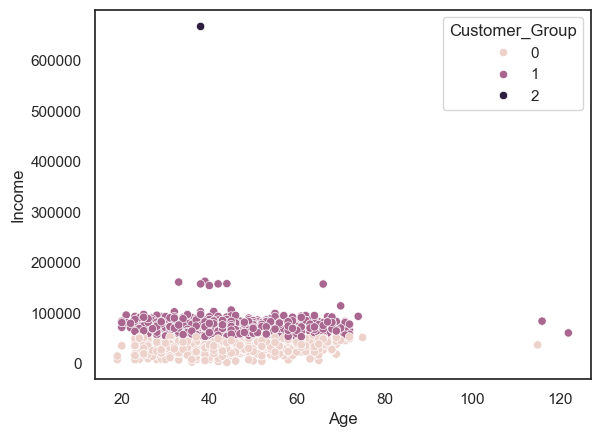

In [69]:
sns.scatterplot(x='Age', y='Income', data=df, hue='Customer_Group')

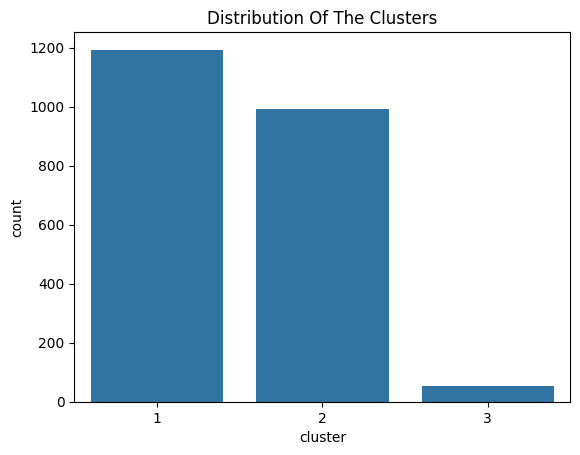

In [51]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

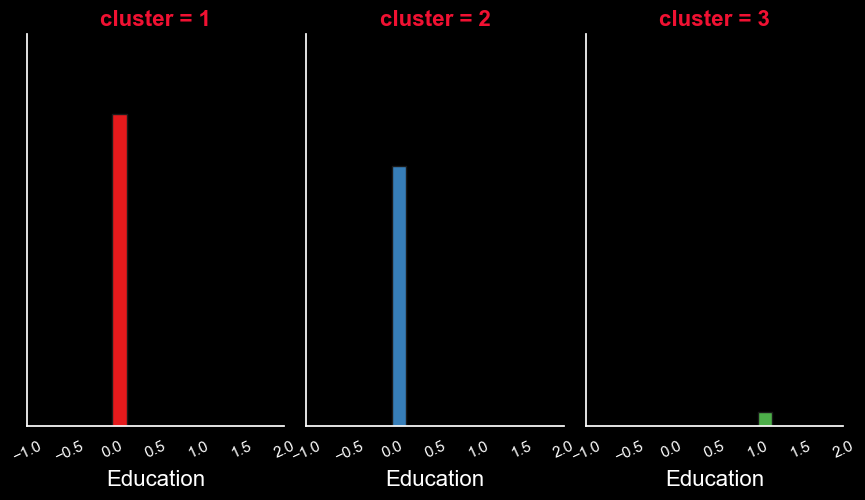

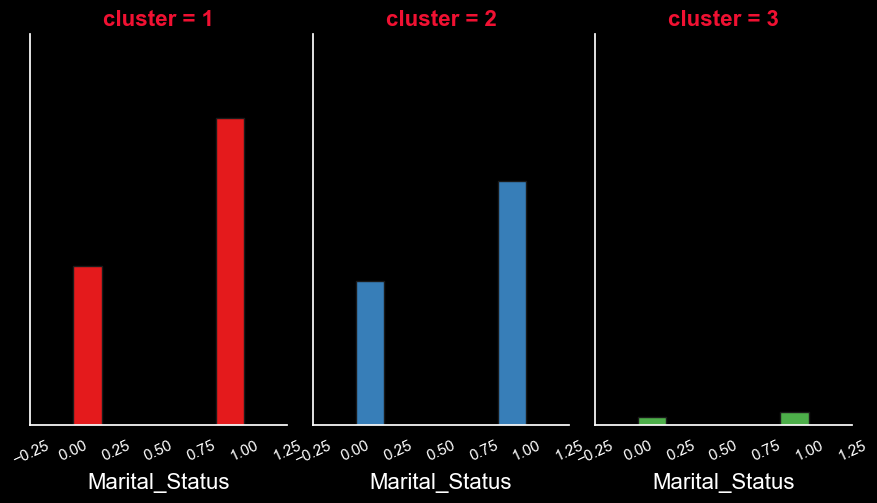

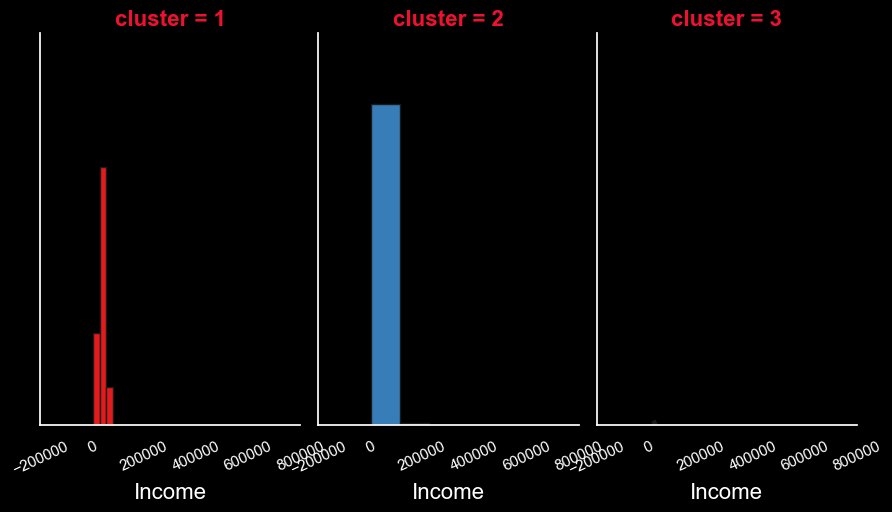

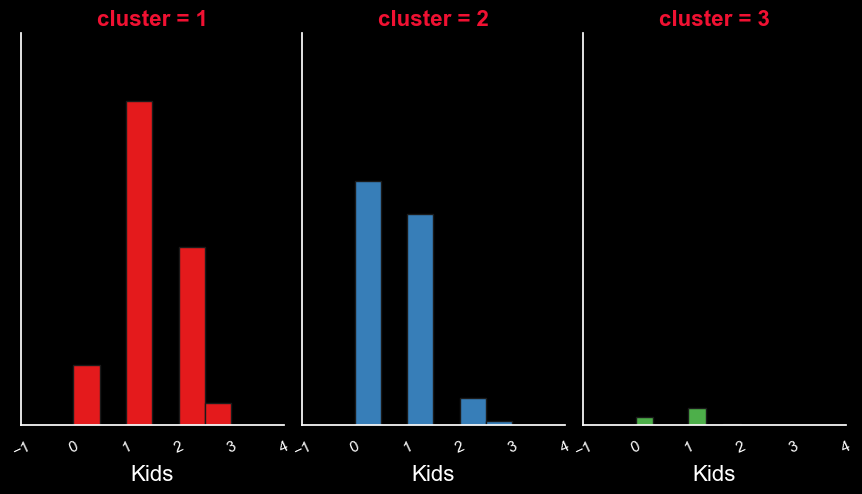

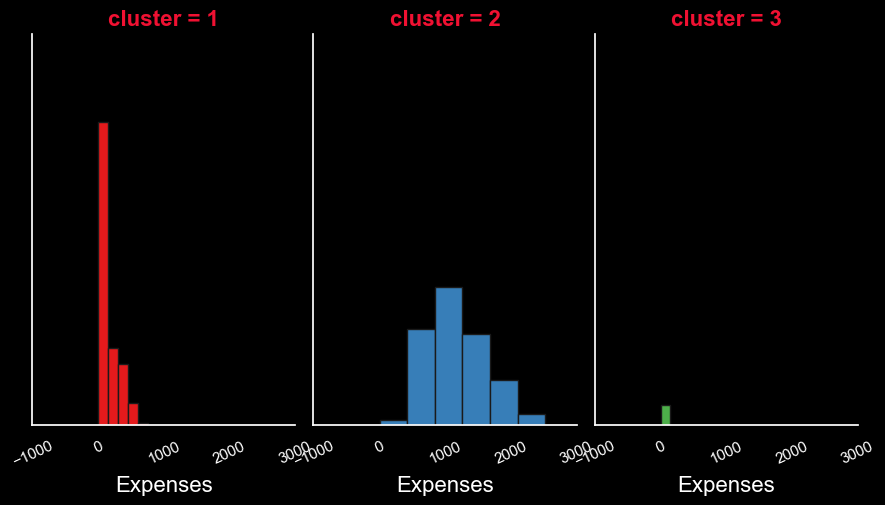

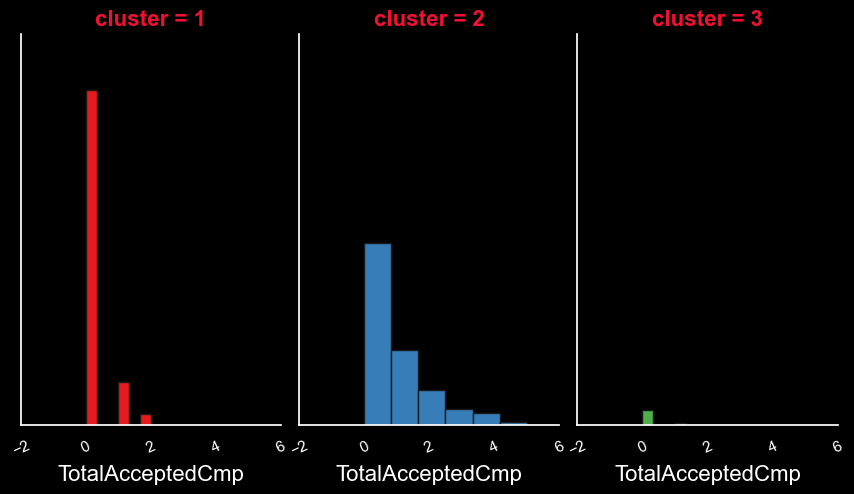

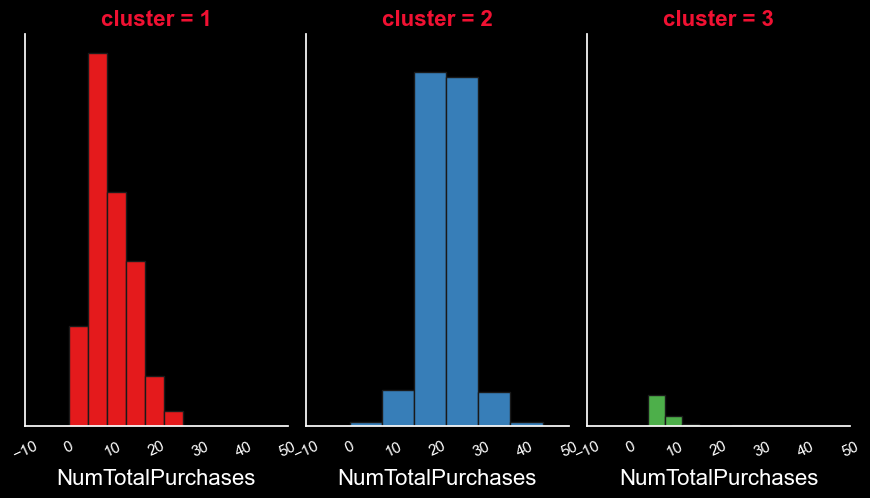

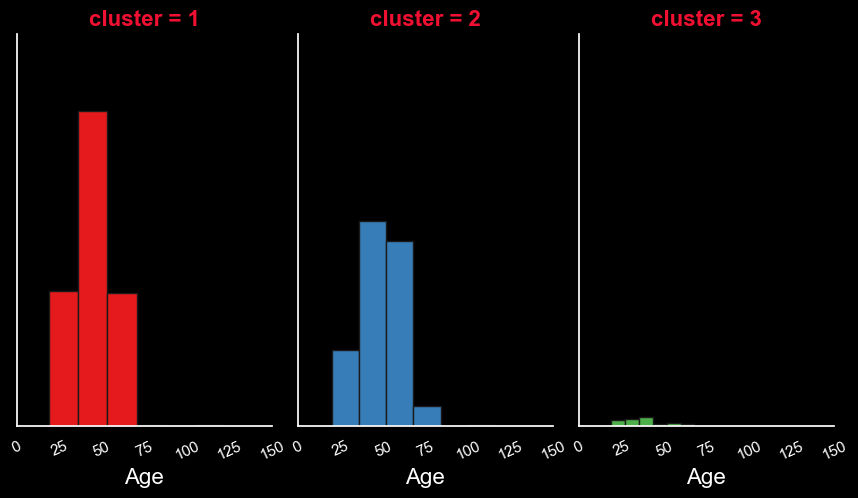

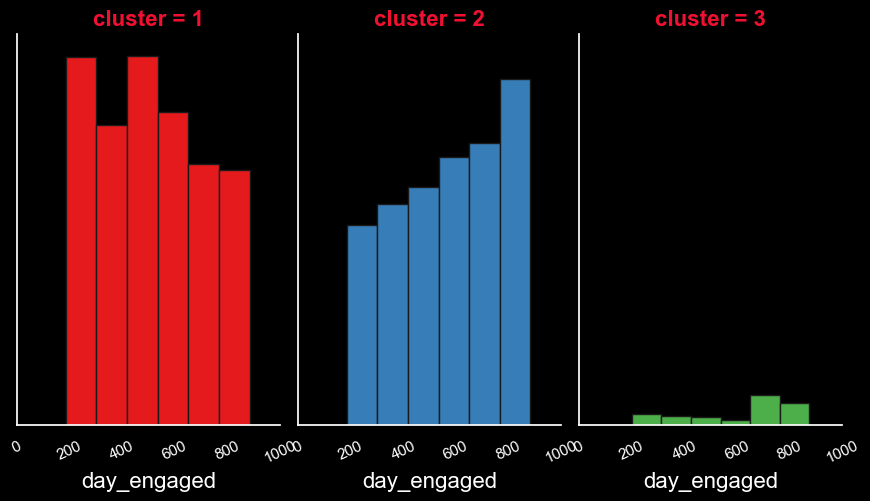

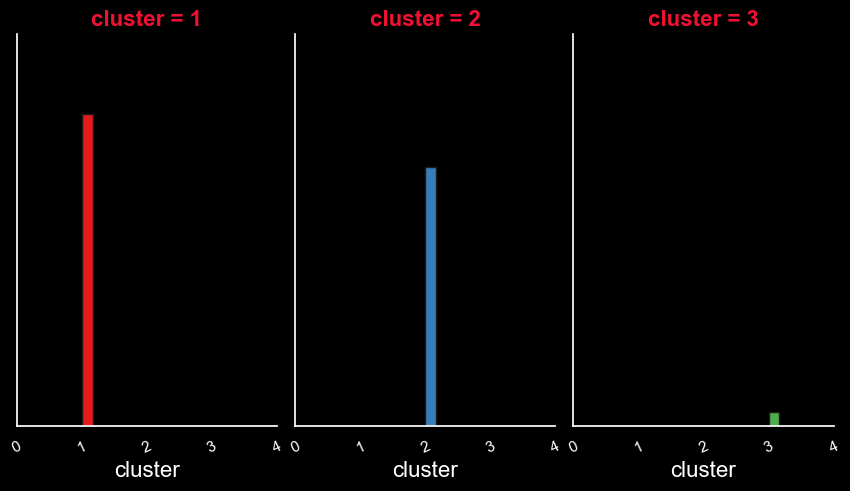

In [54]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False,})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

### Report 